In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

#### Data Loading

In [3]:
#Load dataset
df_train = pd.read_csv('Bigmart_Train.csv')
df_test = pd.read_csv('Bigmart_Test.csv')

In [4]:
df_train.head()

,Item_Identifier,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Identifier,Outlet_Establishment_Year,Outlet_Size,Outlet_Location_Type,Outlet_Type,Item_Outlet_Sales
0,FDA15,9.30,Low Fat,0.016047,Dairy,249.8092,OUT049,1999,Medium,Tier 1,Supermarket Type1,3735.1380
1,DRC01,5.92,Regular,0.019278,Soft Drinks,48.2692,OUT018,2009,Medium,Tier 3,Supermarket Type2,443.4228
2,FDN15,17.50,Low Fat,0.016760,Meat,141.6180,OUT049,1999,Medium,Tier 1,Supermarket Type1,2097.2700
3,FDX07,19.20,Regular,0.000000,Fruits and Vegetables,182.0950,OUT010,1998,NaN,Tier 3,Grocery Store,732.3800
4,NCD19,8.93,Low Fat,0.000000,Household,53.8614,OUT013,1987,High,Tier 3,Supermarket Type1,994.7052


In [5]:
df_train.describe()

,Item_Weight,Item_Visibility,Item_MRP,Outlet_Establishment_Year,Item_Outlet_Sales
count,7060.000000,8523.000000,8523.000000,8523.000000,8523.000000
mean,12.857645,0.066132,140.992782,1997.831867,2181.288914
std,4.643456,0.051598,62.275067,8.371760,1706.499616
min,4.555000,0.000000,31.290000,1985.000000,33.290000
25%,8.773750,0.026989,93.826500,1987.000000,834.247400
50%,12.600000,0.053931,143.012800,1999.000000,1794.331000
75%,16.850000,0.094585,185.643700,2004.000000,3101.296400
max,21.350000,0.328391,266.888400,2009.000000,13086.964800


#### Data Processing

In [6]:
#check datatypes 
df_train.info()
#null values
df_train.isnull().sum()
#unique values
df_train.apply(lambda x: len(x.unique()))

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8523 entries, 0 to 8522
Data columns (total 12 columns):
Item_Identifier              8523 non-null object
Item_Weight                  7060 non-null float64
Item_Fat_Content             8523 non-null object
Item_Visibility              8523 non-null float64
Item_Type                    8523 non-null object
Item_MRP                     8523 non-null float64
Outlet_Identifier            8523 non-null object
Outlet_Establishment_Year    8523 non-null int64
Outlet_Size                  6113 non-null object
Outlet_Location_Type         8523 non-null object
Outlet_Type                  8523 non-null object
Item_Outlet_Sales            8523 non-null float64
dtypes: float64(4), int64(1), object(7)
memory usage: 799.2+ KB


Item_Identifier              1559
Item_Weight                   416
Item_Fat_Content                5
Item_Visibility              7880
Item_Type                      16
Item_MRP                     5938
Outlet_Identifier              10
Outlet_Establishment_Year       9
Outlet_Size                     4
Outlet_Location_Type            3
Outlet_Type                     4
Item_Outlet_Sales            3493
dtype: int64

In [7]:
df_train.isnull().sum()

Item_Identifier                 0
Item_Weight                  1463
Item_Fat_Content                0
Item_Visibility                 0
Item_Type                       0
Item_MRP                        0
Outlet_Identifier               0
Outlet_Establishment_Year       0
Outlet_Size                  2410
Outlet_Location_Type            0
Outlet_Type                     0
Item_Outlet_Sales               0
dtype: int64

In [8]:
#check for categorical cariable 
categorical_col=[]
for x in df_train.dtypes.index:
    #print(df_train.dtypes[x])
    if df_train.dtypes[x]== 'object':
        categorical_col.append(x)
categorical_col    

['Item_Identifier',
 'Item_Fat_Content',
 'Item_Type',
 'Outlet_Identifier',
 'Outlet_Size',
 'Outlet_Location_Type',
 'Outlet_Type']

In [9]:
categorical_col.remove('Item_Identifier')
categorical_col.remove('Outlet_Identifier')

In [10]:
for c in categorical_col:
    print(c)
    print(df_train[c].value_counts())
    print()

Item_Fat_Content
Low Fat    5089
Regular    2889
LF          316
reg         117
low fat     112
Name: Item_Fat_Content, dtype: int64

Item_Type
Fruits and Vegetables    1232
Snack Foods              1200
Household                 910
Frozen Foods              856
Dairy                     682
Canned                    649
Baking Goods              648
Health and Hygiene        520
Soft Drinks               445
Meat                      425
Breads                    251
Hard Drinks               214
Others                    169
Starchy Foods             148
Breakfast                 110
Seafood                    64
Name: Item_Type, dtype: int64

Outlet_Size
Medium    2793
Small     2388
High       932
Name: Outlet_Size, dtype: int64

Outlet_Location_Type
Tier 3    3350
Tier 2    2785
Tier 1    2388
Name: Outlet_Location_Type, dtype: int64

Outlet_Type
Supermarket Type1    5577
Grocery Store        1083
Supermarket Type3     935
Supermarket Type2     928
Name: Outlet_Type, dtype: int6

In [11]:

item_weight_mean= df_train.pivot_table(values='Item_Weight', index= 'Item_Identifier')
item_weight_mean



,Item_Weight
Item_Identifier,
DRA12,11.600
DRA24,19.350
DRA59,8.270
DRB01,7.390
DRB13,6.115
...,...
NCZ30,6.590
NCZ41,19.850
NCZ42,10.500


In [12]:
null_bol= df_train['Item_Weight'].isnull()
null_bol


0       False
1       False
2       False
3       False
4       False
        ...  
8518    False
8519    False
8520    False
8521    False
8522    False
Name: Item_Weight, Length: 8523, dtype: bool

In [13]:
for idx, col in enumerate(df_train['Item_Identifier']):
    #print(idx,col)
    if null_bol[idx]:
        if col in item_weight_mean:
            df_train['Item_Weight'][idx]= item_weight_mean.loc[col]['Item_Weight']
        else:
            df_train['Item_Weight'][idx]= np.mean(df_train['Item_Weight'])
            
        

C:\Users\Umang\Anaconda3\lib\site-packages\ipykernel_launcher.py:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  import sys


In [14]:
df_train['Item_Weight'].isnull().sum()

0

In [15]:
df_train['Item_Weight']

0        9.300
1        5.920
2       17.500
3       19.200
4        8.930
         ...  
8518     6.865
8519     8.380
8520    10.600
8521     7.210
8522    14.800
Name: Item_Weight, Length: 8523, dtype: float64

In [16]:
#categorical variable go for mode
Outlet_type_mode= df_train.pivot_table(values='Outlet_Size', columns= 'Outlet_Type', aggfunc= (lambda x: x.mode()))
Outlet_type_mode


Outlet_Type,Grocery Store,Supermarket Type1,Supermarket Type2,Supermarket Type3
Outlet_Size,Small,Small,Medium,Medium


In [17]:
oulet_type_bol= df_train['Outlet_Size'].isnull()
oulet_type_bol

0       False
1       False
2       False
3        True
4       False
        ...  
8518    False
8519     True
8520    False
8521    False
8522    False
Name: Outlet_Size, Length: 8523, dtype: bool

In [18]:
df_train.loc[oulet_type_bol,'Outlet_Size']= df_train.loc[oulet_type_bol,'Outlet_Type'].apply(lambda x:Outlet_type_mode[x] )
    
#df_train['Outlet_Size'].isnull().sum()

In [19]:
sum(df_train['Item_Visibility']==0)

526

In [20]:
df_train.loc[:, 'Item_Visibility'].replace([0], df_train['Item_Visibility'].mean(), inplace= True)
sum(df_train['Item_Visibility']==0)

0

In [21]:
df_train['Item_Fat_Content'].replace({'LF':'Low Fat', 'low fat':'Low Fat', 'reg': 'Regular'}, inplace= True)

In [22]:
df_train['Item_Fat_Content'].value_counts()

Low Fat    5517
Regular    3006
Name: Item_Fat_Content, dtype: int64

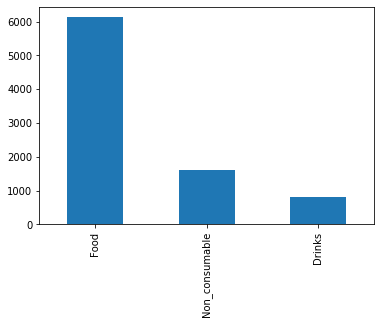

In [23]:
df_train['Item_type_new']= df_train['Item_Identifier'].apply(lambda x: x[:2])
df_train['Item_type_new'].replace({'FD':'Food', 'NC':'Non_consumable', 'DR': 'Drinks'}, inplace= True)
df_train['Item_type_new'].value_counts()
df_train['Item_type_new'].value_counts().plot(kind='bar')

In [24]:
#the first sunscript means condition, if true implement the next
df_train.loc[df_train['Item_type_new']== 'Non_consumable', 'Item_Fat_Content']= 'Non-edible'

In [25]:
df_train['Item_Fat_Content'].value_counts()

Low Fat       3918
Regular       3006
Non-edible    1599
Name: Item_Fat_Content, dtype: int64

In [26]:
#the year established has big numbers associated, which will impact the performance of the modal, creating another category field to keep the numbers to deal with small
# how long the outlet has been opened for(in years), as the dataset is collected in 2013, taking that as base lets create a variable
df_train['Years_since_outlet_opened'] =2013- df_train['Outlet_Establishment_Year']

In [27]:
df_train.head()

,Item_Identifier,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Identifier,Outlet_Establishment_Year,Outlet_Size,Outlet_Location_Type,Outlet_Type,Item_Outlet_Sales,Item_type_new,Years_since_outlet_opened
0,FDA15,9.30,Low Fat,0.016047,Dairy,249.8092,OUT049,1999,Medium,Tier 1,Supermarket Type1,3735.1380,Food,14
1,DRC01,5.92,Regular,0.019278,Soft Drinks,48.2692,OUT018,2009,Medium,Tier 3,Supermarket Type2,443.4228,Drinks,4
2,FDN15,17.50,Low Fat,0.016760,Meat,141.6180,OUT049,1999,Medium,Tier 1,Supermarket Type1,2097.2700,Food,14
3,FDX07,19.20,Regular,0.066132,Fruits and Vegetables,182.0950,OUT010,1998,Small,Tier 3,Grocery Store,732.3800,Food,15
4,NCD19,8.93,Non-edible,0.066132,Household,53.8614,OUT013,1987,High,Tier 3,Supermarket Type1,994.7052,Non_consumable,26


#### Exploratory Data Analysis

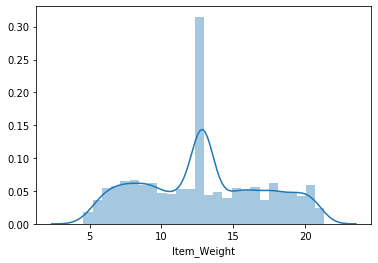

In [30]:
sns.distplot(df_train['Item_Weight'])
#the mean is higher because we have filled missing values with mean

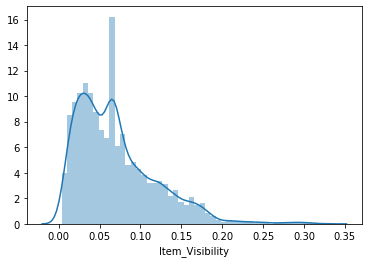

In [31]:
sns.distplot(df_train['Item_Visibility'])

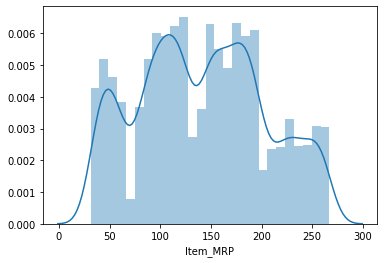

In [32]:
sns.distplot(df_train['Item_MRP'])

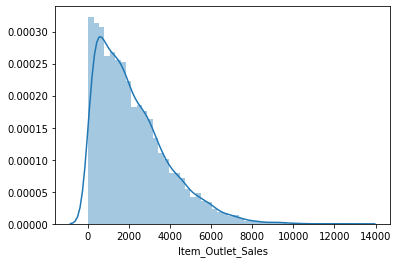

In [33]:
sns.distplot(df_train['Item_Outlet_Sales'])

In [34]:
#since the values are large, it would affect the performance of the model, lets normalize, log transformation, so that the model will be able to predict with less error
df_train['Item_Outlet_Sales_N']= np.log(1+df_train['Item_Outlet_Sales'])


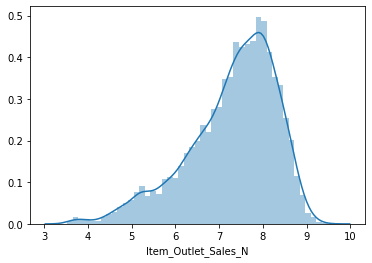

In [35]:
sns.distplot(df_train['Item_Outlet_Sales_N'])

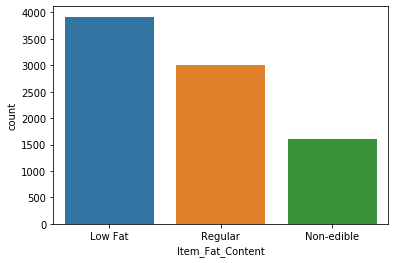

In [36]:
#for categorical attributes
sns.countplot(df_train['Item_Fat_Content'])

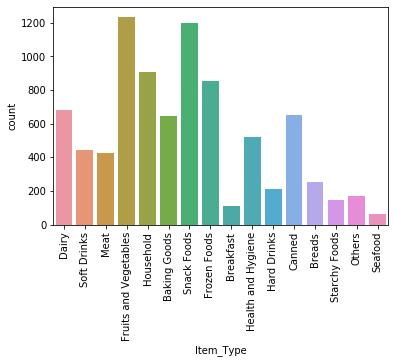

In [42]:
x_lab = list(df_train['Item_Type'].unique())
chart = sns.countplot(df_train['Item_Type'])
chart.set_xticklabels(labels=x_lab, rotation=90)
chart


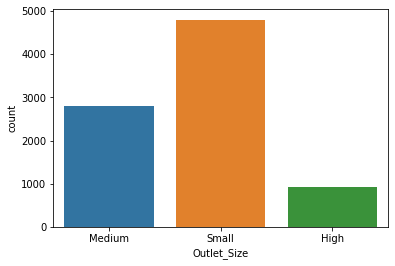

In [43]:
sns.countplot(df_train['Outlet_Size'])

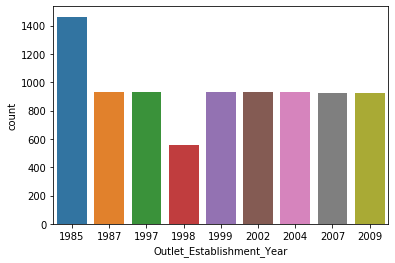

In [44]:
sns.countplot(df_train['Outlet_Establishment_Year'])

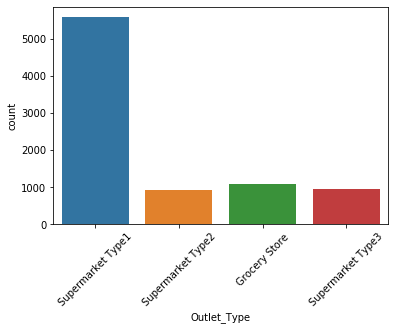

In [47]:
x_lab2 = list(df_train['Outlet_Type'].unique())
c2= sns.countplot(df_train['Outlet_Type'])
c2.set_xticklabels(labels=x_lab2, rotation=45)
c2

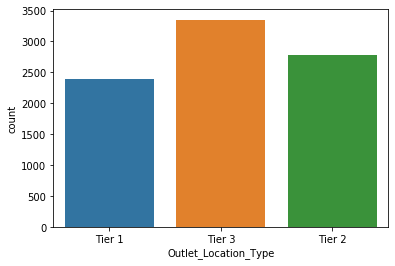

In [48]:
sns.countplot(df_train['Outlet_Location_Type'])

#### Correlation Matrix

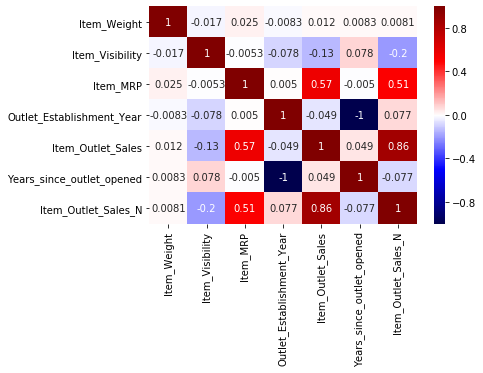

In [50]:
corr= df_train.corr()
#display in heatmap
sns.heatmap(corr, annot= True, cmap= 'seismic')

In [ ]:
#independent Variables which are impacting prediction variables
#Item_Outlet_Sales_N is being affected by Item_MRP

#### Label Encoding

In [52]:
from sklearn.preprocessing import LabelEncoder
le= LabelEncoder() #for initialization
#convert outlet identifier into numerical values, convert the categorical attribute into label encoder for model improvement, so that model can process as numerical value
df_train['Outlet'] = le.fit_transform(df_train['Outlet_Identifier'])
cate_col= ['Item_Fat_Content','Item_Type', 'Outlet_Size','Outlet_Location_Type','Outlet_Type','Item_type_new']

for col in cate_col:
    df_train[col] = le.fit_transform(df_train[col])   #change corresponding attributes into numerical values so that model is able to acess the values
    


In [53]:
df_train.head()

,Item_Identifier,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Identifier,Outlet_Establishment_Year,Outlet_Size,Outlet_Location_Type,Outlet_Type,Item_Outlet_Sales,Item_type_new,Years_since_outlet_opened,Item_Outlet_Sales_N,Outlet
0,FDA15,9.30,0,0.016047,4,249.8092,OUT049,1999,1,0,1,3735.1380,1,14,8.225808,9
1,DRC01,5.92,2,0.019278,14,48.2692,OUT018,2009,1,2,2,443.4228,0,4,6.096776,3
2,FDN15,17.50,0,0.016760,10,141.6180,OUT049,1999,1,0,1,2097.2700,1,14,7.648868,9
3,FDX07,19.20,2,0.066132,6,182.0950,OUT010,1998,2,2,0,732.3800,1,15,6.597664,0
4,NCD19,8.93,1,0.066132,9,53.8614,OUT013,1987,0,2,1,994.7052,2,26,6.903451,1


#### Onehot encoding 


In [54]:
### Improves model by 0.2-0.5, better way of encoding the categorical variables, but takes a lot of time to train the model
df_train= pd.get_dummies(df_train, columns= ['Item_Fat_Content', 'Outlet_Size','Outlet_Location_Type','Outlet_Type','Item_type_new'])
df_train.head()

,Item_Identifier,Item_Weight,Item_Visibility,Item_Type,Item_MRP,Outlet_Identifier,Outlet_Establishment_Year,Item_Outlet_Sales,Years_since_outlet_opened,Item_Outlet_Sales_N,...,Outlet_Location_Type_0,Outlet_Location_Type_1,Outlet_Location_Type_2,Outlet_Type_0,Outlet_Type_1,Outlet_Type_2,Outlet_Type_3,Item_type_new_0,Item_type_new_1,Item_type_new_2
0,FDA15,9.30,0.016047,4,249.8092,OUT049,1999,3735.1380,14,8.225808,...,1,0,0,0,1,0,0,0,1,0
1,DRC01,5.92,0.019278,14,48.2692,OUT018,2009,443.4228,4,6.096776,...,0,0,1,0,0,1,0,1,0,0
2,FDN15,17.50,0.016760,10,141.6180,OUT049,1999,2097.2700,14,7.648868,...,1,0,0,0,1,0,0,0,1,0
3,FDX07,19.20,0.066132,6,182.0950,OUT010,1998,732.3800,15,6.597664,...,0,0,1,1,0,0,0,0,1,0
4,NCD19,8.93,0.066132,9,53.8614,OUT013,1987,994.7052,26,6.903451,...,0,0,1,0,1,0,0,0,0,1


### Input Split

In [55]:
X= df_train.drop(columns=['Item_Identifier','Outlet_Identifier','Outlet_Establishment_Year','Item_Outlet_Sales','Item_Outlet_Sales_N'])
y= df_train['Item_Outlet_Sales_N']
                 

### Model Training

In [56]:
from sklearn.model_selection import cross_val_score
from sklearn.metrics import mean_squared_error
def train(model, X, y):
    # train the model
    model.fit(X, y)
    
    # predict the training set
    pred = model.predict(X)
    
    # perform cross-validation
    cv_score = cross_val_score(model, X, y, scoring='neg_mean_squared_error', cv=5)
    cv_score = np.abs(np.mean(cv_score))
    
    print("Model Report")
    print("MSE:",mean_squared_error(y,pred))
    print("CV Score:", cv_score)

### Linear Regression

Model Report
MSE: 0.2880065032501795
CV Score: 0.2892075651852786


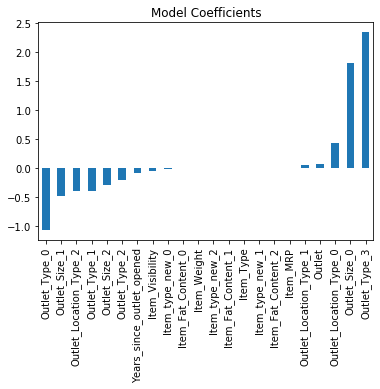

In [57]:
from sklearn.linear_model import LinearRegression, Ridge, Lasso
model = LinearRegression(normalize=True)
train(model, X, y)
coef = pd.Series(model.coef_, X.columns).sort_values()
coef.plot(kind='bar', title="Model Coefficients")

### RIDGE

Model Report
MSE: 0.4280298560568348
CV Score: 0.4289289251562643


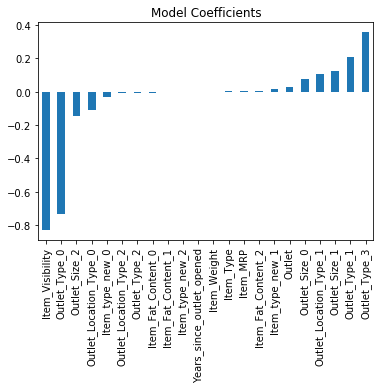

In [58]:
model = Ridge(normalize=True)
train(model, X, y)
coef = pd.Series(model.coef_, X.columns).sort_values()
coef.plot(kind='bar', title="Model Coefficients")

### Lasso

Model Report
MSE: 0.7628688679102086
CV Score: 0.7630789166281843


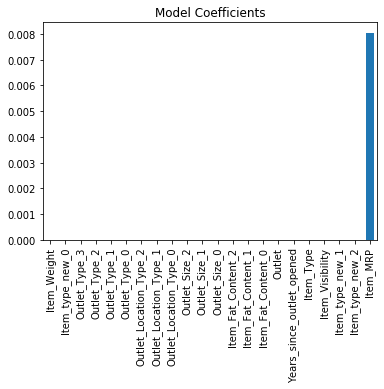

In [59]:
model = Lasso()
train(model, X, y)
coef = pd.Series(model.coef_, X.columns).sort_values()
coef.plot(kind='bar', title="Model Coefficients")

### Decision Tree Regressor

Model Report
MSE: 9.251544668064852e-11
CV Score: 0.5739254985766367


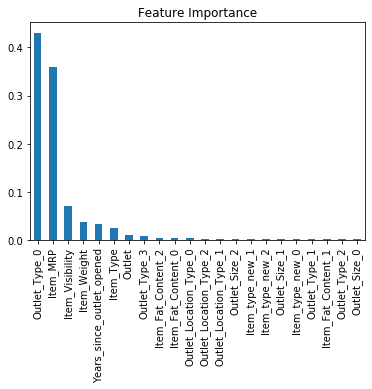

In [60]:
from sklearn.tree import DecisionTreeRegressor
model = DecisionTreeRegressor()
train(model, X, y)
coef = pd.Series(model.feature_importances_, X.columns).sort_values(ascending=False)
coef.plot(kind='bar', title="Feature Importance")

### Random Forest

C:\Users\Umang\Anaconda3\lib\site-packages\sklearn\ensemble\forest.py:245: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)


Model Report
MSE: 0.05723573734205044
CV Score: 0.33494035800697686


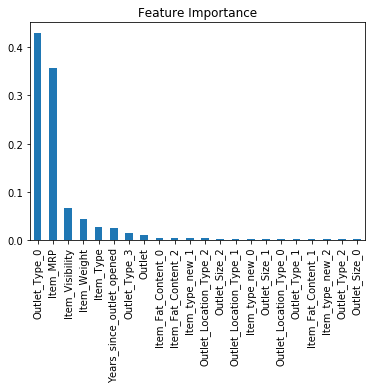

In [61]:
from sklearn.ensemble import RandomForestRegressor
model = RandomForestRegressor()
train(model, X, y)
coef = pd.Series(model.feature_importances_, X.columns).sort_values(ascending=False)
coef.plot(kind='bar', title="Feature Importance")

### Extra Tree Regressor

C:\Users\Umang\Anaconda3\lib\site-packages\sklearn\ensemble\forest.py:245: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)


Model Report
MSE: 8.676962164593733e-13
CV Score: 0.35338408472387506


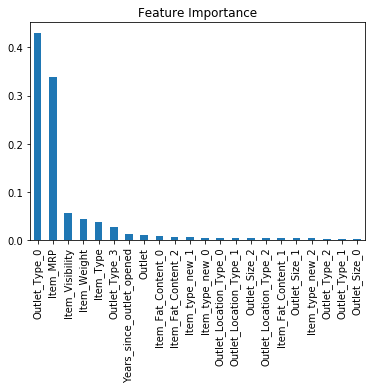

In [62]:

from sklearn.ensemble import ExtraTreesRegressor
model = ExtraTreesRegressor()
train(model, X, y)
coef = pd.Series(model.feature_importances_, X.columns).sort_values(ascending=False)
coef.plot(kind='bar', title="Feature Importance")

In [68]:
pip install xgboost

Note: you may need to restart the kernel to use updated packages.


### XGBoost

Model Report
MSE: 0.13208899376350539
CV Score: 0.3092192817617371


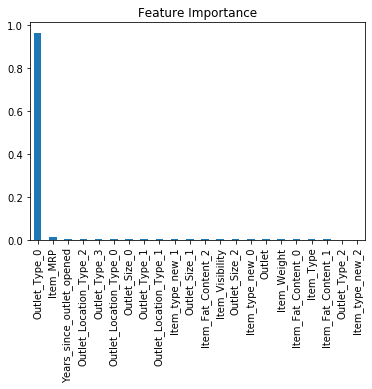

In [70]:
from xgboost import XGBRegressor
model = XGBRegressor()
train(model, X, y)
coef = pd.Series(model.feature_importances_, X.columns).sort_values(ascending=False)
coef.plot(kind='bar', title="Feature Importance")

#### Linear Regression model gave best Cross- Validation Score